# Objective
* Predict if # of bikes needs to be increased at certain hours or not
* Data Exploration and Feaure Engineering
* Binary Classification Problem
* Train-validation set has *1600* records

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
x_train_df = pd.read_csv('/content/X_train.csv')
x_valid_df = pd.read_csv('/content/X_test.csv')

In [4]:
y_train_df = pd.read_csv('/content/y_train.csv')
y_valid_df = pd.read_csv('/content/y_test.csv')

## Data Split
Split data into:-
* Train set - 80%
* Validation set - 20%

*rearrange the dataframe*

In [5]:
y_train_df = y_train_df.drop('Unnamed: 0', axis=1)
y_valid_df = y_valid_df.drop('Unnamed: 0', axis=1)
x_train_df = x_train_df.drop('Unnamed: 0', axis=1)
x_valid_df = x_valid_df.drop('Unnamed: 0', axis=1)

In [6]:
print(y_train_df.shape)
y_train_df.head()

(1280, 1)


,increase_stock
0,0
1,0
2,0
3,0
4,0


In [7]:
print(y_valid_df.shape)
y_valid_df.head()

(320, 1)


,increase_stock
0,0
1,0
2,0
3,0
4,0


In [8]:
x_train_df = pd.concat([x_train_df.iloc[:,1:], x_train_df.iloc[:,0]], axis=1)
x_valid_df = pd.concat([x_valid_df.iloc[:,1:], x_valid_df.iloc[:,0]], axis=1)

In [9]:
print(x_train_df.shape)
x_train_df.head()

(1280, 14)


,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
0,1.9,78.60,0.0,0.0,0.0,79.3,16.0,0.965926,0.258819,0.781831,0.623490,-2.449294e-16,1.000000e+00,0
1,4.7,43.39,0.0,0.0,11.9,79.3,16.0,-0.707107,0.707107,-0.433884,-0.900969,1.000000e+00,6.123234e-17,0
2,23.7,76.99,0.0,0.0,10.5,100.0,16.0,0.965926,-0.258819,0.000000,1.000000,-8.660254e-01,-5.000000e-01,0
3,20.8,54.42,0.0,0.0,12.2,79.3,16.0,-0.707107,0.707107,0.974928,-0.222521,-1.000000e+00,-1.836970e-16,0
4,14.9,34.22,0.0,0.0,19.8,46.6,16.0,-0.258819,-0.965926,0.000000,1.000000,8.660254e-01,-5.000000e-01,0


In [10]:
print(x_valid_df.shape)
x_valid_df.head()

(320, 14)


,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
0,20.1,99.89,0.022,0.0,9.3,100.0,8.9,-0.707107,0.707107,0.974928,-0.222521,-5.000000e-01,8.660254e-01,1
1,24.8,82.50,0.000,0.0,14.4,96.0,16.0,0.500000,0.866025,-0.433884,-0.900969,-5.000000e-01,-8.660254e-01,0
2,8.7,45.67,0.000,0.0,11.2,81.1,16.0,0.258819,0.965926,0.974928,-0.222521,1.000000e+00,6.123234e-17,0
3,21.0,42.59,0.000,0.0,16.3,84.8,16.0,-0.500000,-0.866025,0.433884,-0.900969,-1.000000e+00,-1.836970e-16,0
4,1.6,89.06,2.159,0.4,7.4,100.0,6.6,0.965926,-0.258819,0.433884,-0.900969,-2.449294e-16,1.000000e+00,0


In [11]:
x_train_df.describe()

,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1.280000e+03,1.280000e+03,1280.000000
mean,14.965469,63.684484,0.105041,0.041922,13.103828,63.891875,15.341875,-0.001658,-1.006787e-03,-0.028125,0.002795,2.624098e-02,4.422073e-03,0.032031
std,9.295233,18.827628,0.660475,0.422102,7.880379,33.143593,2.314768,0.706441,7.083218e-01,0.705508,0.708689,6.991107e-01,7.150646e-01,0.176152
min,-9.100000,15.850000,0.000000,0.000000,0.000000,0.000000,0.100000,-1.000000,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,0.000000
25%,7.375000,47.772500,0.000000,0.000000,7.400000,26.400000,16.000000,-0.707107,-7.071068e-01,-0.781831,-0.900969,-5.000000e-01,-8.660254e-01,0.000000
50%,14.900000,65.065000,0.000000,0.000000,12.200000,79.300000,16.000000,0.000000,-1.836970e-16,0.000000,-0.222521,1.224647e-16,6.123234e-17,0.000000
75%,22.825000,79.375000,0.000000,0.000000,17.700000,92.725000,16.000000,0.707107,7.071068e-01,0.781831,0.623490,8.660254e-01,8.660254e-01,0.000000
max,35.600000,99.850000,11.133000,6.680000,43.800000,100.000000,16.000000,1.000000,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00,1.000000


In [12]:
x_valid_df.describe()

,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,3.200000e+02,3.200000e+02,320.000000,320.000000,3.200000e+02,3.200000e+02,320.000000
mean,16.189687,64.901281,0.190047,0.045875,12.997188,66.044375,15.353125,2.539551e-02,-1.108314e-02,0.003339,-0.017852,3.932282e-03,-3.800079e-02,0.037500
std,9.090478,20.056061,1.579030,0.418201,7.251762,31.110295,2.362917,6.827785e-01,7.322418e-01,0.692421,0.723434,7.294629e-01,6.852405e-01,0.190281
min,-8.400000,16.860000,0.000000,0.000000,0.000000,0.000000,0.100000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,0.000000
25%,9.075000,48.027500,0.000000,0.000000,7.800000,44.600000,16.000000,-5.000000e-01,-7.468364e-01,-0.781831,-0.900969,-5.915064e-01,-8.660254e-01,0.000000
50%,16.700000,65.975000,0.000000,0.000000,12.600000,79.300000,16.000000,1.224647e-16,-1.836970e-16,0.000000,-0.222521,1.224647e-16,-1.836970e-16,0.000000
75%,23.625000,82.297500,0.000000,0.000000,16.525000,94.150000,16.000000,7.071068e-01,7.071068e-01,0.781831,0.623490,8.660254e-01,5.000000e-01,0.000000
max,35.500000,99.890000,25.871000,6.710000,38.200000,100.000000,16.000000,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00,1.000000


**Apply Standard scaler on numerical features**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale = StandardScaler()
x_train_df.iloc[:,:7] = scale.fit_transform(X=x_train_df.iloc[:,:7])
x_valid_df.iloc[:,:7] = scale.transform(X=x_valid_df.iloc[:,:7])

In [15]:
x_train_df.describe()

,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
count,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1280.000000,1.280000e+03,1280.000000,1280.000000,1.280000e+03,1.280000e+03,1280.000000
mean,6.106227e-17,1.748601e-16,1.387779e-18,5.551115e-18,-1.845746e-16,-2.331468e-16,-7.362166e-16,-0.001658,-1.006787e-03,-0.028125,0.002795,2.624098e-02,4.422073e-03,0.032031
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,0.706441,7.083218e-01,0.705508,0.708689,6.991107e-01,7.150646e-01,0.176152
min,-2.590024e+00,-2.541647e+00,-1.591002e-01,-9.935568e-02,-1.663492e+00,-1.928483e+00,-6.587197e+00,-1.000000,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,0.000000
25%,-8.169172e-01,-8.454705e-01,-1.591002e-01,-9.935568e-02,-7.240842e-01,-1.131637e+00,2.844269e-01,-0.707107,-7.071068e-01,-0.781831,-0.900969,-5.000000e-01,-8.660254e-01,0.000000
50%,-7.046014e-03,7.335259e-02,-1.591002e-01,-9.935568e-02,-1.147383e-01,4.650717e-01,2.844269e-01,0.000000,-1.836970e-16,0.000000,-0.222521,1.224647e-16,6.123234e-17,0.000000
75%,8.458748e-01,8.337029e-01,-1.591002e-01,-9.935568e-02,5.834705e-01,8.702857e-01,2.844269e-01,0.707107,7.071068e-01,0.781831,0.623490,8.660254e-01,8.660254e-01,0.000000
max,2.220772e+00,1.921626e+00,1.670354e+01,1.573238e+01,3.896789e+00,1.089871e+00,2.844269e-01,1.000000,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00,1.000000


In [16]:
x_valid_df.describe()

,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,3.200000e+02,3.200000e+02,320.000000,320.000000,3.200000e+02,3.200000e+02,320.000000
mean,0.131755,0.064654,0.128755,0.009369,-0.013538,0.064970,0.004862,2.539551e-02,-1.108314e-02,0.003339,-0.017852,3.932282e-03,-3.800079e-02,0.037500
std,0.978354,1.065663,2.391683,0.991145,0.920590,0.939019,1.021200,6.827785e-01,7.322418e-01,0.692421,0.723434,7.294629e-01,6.852405e-01,0.190281
min,-2.514687,-2.487981,-0.159100,-0.099356,-1.663492,-1.928483,-6.587197,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,0.000000
25%,-0.633956,-0.831921,-0.159100,-0.099356,-0.673305,-0.582297,0.284427,-5.000000e-01,-7.468364e-01,-0.781831,-0.900969,-5.915064e-01,-8.660254e-01,0.000000
50%,0.186677,0.121705,-0.159100,-0.099356,-0.063959,0.465072,0.284427,1.224647e-16,-1.836970e-16,0.000000,-0.222521,1.224647e-16,-1.836970e-16,0.000000
75%,0.931974,0.988988,-0.159100,-0.099356,0.434308,0.913297,0.284427,7.071068e-01,7.071068e-01,0.781831,0.623490,8.660254e-01,5.000000e-01,0.000000
max,2.210010,1.923751,39.026504,15.803478,3.185885,1.089871,0.284427,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00,1.000000


In [17]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        1280 non-null   float64
 1   humidity    1280 non-null   float64
 2   precip      1280 non-null   float64
 3   snowdepth   1280 non-null   float64
 4   windspeed   1280 non-null   float64
 5   cloudcover  1280 non-null   float64
 6   visibility  1280 non-null   float64
 7   hour_sin    1280 non-null   float64
 8   hour_cos    1280 non-null   float64
 9   day_sin     1280 non-null   float64
 10  day_cos     1280 non-null   float64
 11  month_sin   1280 non-null   float64
 12  month_cos   1280 non-null   float64
 13  holiday     1280 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 140.1 KB


In [18]:
x_train_df.head()

,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
0,-1.406159,0.792524,-0.1591,-0.099356,-1.663492,0.465072,0.284427,0.965926,0.258819,0.781831,0.623490,-2.449294e-16,1.000000e+00,0
1,-1.104812,-1.078331,-0.1591,-0.099356,-0.152822,0.465072,0.284427,-0.707107,0.707107,-0.433884,-0.900969,1.000000e+00,6.123234e-17,0
2,0.940046,0.706978,-0.1591,-0.099356,-0.330548,1.089871,0.284427,0.965926,-0.258819,0.000000,1.000000,-8.660254e-01,-5.000000e-01,0
3,0.627936,-0.492261,-0.1591,-0.099356,-0.114738,0.465072,0.284427,-0.707107,0.707107,0.974928,-0.222521,-1.000000e+00,-1.836970e-16,0
4,-0.007046,-1.565572,-0.1591,-0.099356,0.850059,-0.521930,0.284427,-0.258819,-0.965926,0.000000,1.000000,8.660254e-01,-5.000000e-01,0


In [19]:
x_valid_df.head()

,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,holiday
0,0.552599,1.923751,-0.125778,-0.099356,-0.482885,1.089871,-2.784034,-0.707107,0.707107,0.974928,-0.222521,-5.000000e-01,8.660254e-01,1
1,1.058432,0.999747,-0.159100,-0.099356,0.164545,0.969137,0.284427,0.500000,0.866025,-0.433884,-0.900969,-5.000000e-01,-8.660254e-01,0
2,-0.674315,-0.957185,-0.159100,-0.099356,-0.241685,0.519402,0.284427,0.258819,0.965926,0.974928,-0.222521,1.000000e+00,6.123234e-17,0
3,0.649461,-1.120838,-0.159100,-0.099356,0.405745,0.631081,0.284427,-0.500000,-0.866025,0.433884,-0.900969,-1.000000e+00,-1.836970e-16,0
4,-1.438446,1.348308,3.111037,0.848652,-0.724084,1.089871,-3.778042,0.965926,-0.258819,0.433884,-0.900969,-2.449294e-16,1.000000e+00,0


## Data Modeling
* Apply Naive classfier
* Will always predict 'low_bike_demand'
* Something that forms a benchmark

## Metrics
* Accuracy
* F1 score
* Precision and Recall

In [20]:
X_train = np.array(x_train_df)
y_train = np.array(y_train_df)

In [21]:
X_valid = np.array(x_valid_df)
y_valid = np.array(y_valid_df)

In [22]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='constant', constant=0, random_state=42)

In [23]:
dummy_classifier.fit(X_train, y_train)

DummyClassifier(constant=0, random_state=42, strategy='constant')

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
## metrics
## classification report
print(classification_report(y_valid,dummy_classifier.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       262
           1       0.00      0.00      0.00        58

    accuracy                           0.82       320
   macro avg       0.41      0.50      0.45       320
weighted avg       0.67      0.82      0.74       320



* benchmark precision
* benchmark recall
* benchmark F1 Score
* benchmark accuracy

## Vanilla Logistic Regression

**Hyper-parameters to fine-tune**
* penalty
* lambda
* solver
* max_iter
* class_weights

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer, f1_score

In [27]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1050,  230]))

In [28]:
## Possible set of hyper-parameter values
params = {
'penalty': ['l1','l2', 'elasticnet', None],
'C': [0.02,0.05,0.1,0.2,0.5,1,5,10],
'max_iter': [1,3,5,10,50,75,100],
'class_weight': [None,'balanced',{1:1.25,0:1},{1:1.5,0:1},{1:2,0:1},{1:2.5,0:1},{1:3,0:1}],
'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','saga']}

In [29]:
def custom_score(y_true, y_pred, beta=0.0001):

    s1 = f1_score(y_true,y_pred)
    s2 = recall_score(y_true,y_pred)
    return s1+(beta*s2) # prioritize F1 score

In [30]:
custom_metric = make_scorer(custom_score, greater_is_better=True)

In [31]:
logistic_regression = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=logistic_regression,
                           param_grid=params,
                           cv=5,
                           verbose=1,
                           scoring='f1')

In [32]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7840 candidates, totalling 39200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 5, 10],
                         'class_weight': [None, 'balanced', {0: 1, 1: 1.25},
                                          {0: 1, 1: 1.5}, {0: 1, 1: 2},
                                          {0: 1, 1: 2.5}, {0: 1, 1: 3}],
                         'max_iter': [1, 3, 5, 10, 50, 75, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'saga']},
             scoring='f1', verbose=1)

In [33]:
grid_search_estimator = grid_search.best_estimator_
grid_search.best_params_

{'C': 0.05,
 'class_weight': {1: 2.5, 0: 1},
 'max_iter': 5,
 'penalty': 'l1',
 'solver': 'saga'}

In [34]:
print(classification_report(y_valid,grid_search_estimator.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       262
           1       0.56      0.78      0.65        58

    accuracy                           0.85       320
   macro avg       0.75      0.82      0.77       320
weighted avg       0.87      0.85      0.86       320



## SMOTE
* oversampling *high_bike_demand* labels
* sampling strategy

In [35]:
from imblearn.over_sampling import SMOTENC

In [36]:
over_sample = SMOTENC(categorical_features=[13],
                      sampling_strategy=0.4,
                      random_state=42)

In [37]:
X_train_resample, y_train_resample = over_sample.fit_resample(X_train, y_train)

In [38]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_resample, return_counts=True))

(array([0, 1]), array([1050,  230]))
(array([0, 1]), array([1050,  420]))


Run grid-search to find new set of optimal hyper-parameters

In [39]:
print(X_train_resample[0])

[-1.40615900e+00  7.92523902e-01 -1.59100163e-01 -9.93556800e-02
 -1.66349237e+00  4.65071708e-01  2.84426865e-01  9.65925826e-01
  2.58819045e-01  7.81831482e-01  6.23489802e-01 -2.44929360e-16
  1.00000000e+00  0.00000000e+00]


In [40]:
grid_search.fit(X_train_resample, y_train_resample)

Fitting 5 folds for each of 7840 candidates, totalling 39200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 5, 10],
                         'class_weight': [None, 'balanced', {0: 1, 1: 1.25},
                                          {0: 1, 1: 1.5}, {0: 1, 1: 2},
                                          {0: 1, 1: 2.5}, {0: 1, 1: 3}],
                         'max_iter': [1, 3, 5, 10, 50, 75, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'saga']},
             scoring='f1', verbose=1)

In [41]:
resample_grid_search_estimator = grid_search.best_estimator_
grid_search.best_params_

{'C': 0.5,
 'class_weight': {1: 2, 0: 1},
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'saga'}

In [42]:
print(classification_report(y_valid,resample_grid_search_estimator.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       262
           1       0.50      0.84      0.63        58

    accuracy                           0.82       320
   macro avg       0.73      0.83      0.75       320
weighted avg       0.88      0.82      0.83       320



## Logistic Regression with feature engineering

**Numerical features to combine:-**
* temp and humidity
* temp and precip
* temp and windspeed
* temp and snowdepth
* humidity and precip
* humidity and windspeed
* precip and snowdepth
* precip and cloudcover
* precip and windspeed
* precip and visibility
* windspeed and cloudcover

---

**Categorical features to combine:-**
* hour_of_day and day_of_week
* day_of_week and month
* hour_of_day and month

In [43]:
## Could have used the lib
def feature_polynomial(X):

    return np.concatenate((X,
        (X[:,0]*X[:,1]).reshape((X.shape[0],1)),
        (X[:,0]*X[:,2]).reshape((X.shape[0],1)),
        (X[:,0]*X[:,4]).reshape((X.shape[0],1)),
        (X[:,0]*X[:,3]).reshape((X.shape[0],1)),
        (X[:,1]*X[:,2]).reshape((X.shape[0],1)),
        (X[:,1]*X[:,4]).reshape((X.shape[0],1)),
        (X[:,2]*X[:,3]).reshape((X.shape[0],1)),
        (X[:,2]*X[:,5]).reshape((X.shape[0],1)),
        (X[:,2]*X[:,4]).reshape((X.shape[0],1)),
        (X[:,2]*X[:,6]).reshape((X.shape[0],1)),
        (X[:,4]*X[:,5]).reshape((X.shape[0],1)),
        (X[:,7]*X[:,9]).reshape((X.shape[0],1)),
        (X[:,8]*X[:,10]).reshape((X.shape[0],1)),
        (X[:,7]*X[:,11]).reshape((X.shape[0],1)),
        (X[:,8]*X[:,12]).reshape((X.shape[0],1)),
        (X[:,9]*X[:,11]).reshape((X.shape[0],1)),
        (X[:,10]*X[:,12]).reshape((X.shape[0],1))), axis=1)

In [44]:
X_train_fe = feature_polynomial(X_train)
X_valid_fe = feature_polynomial(X_valid)

In [45]:
print(X_train_fe[0])

[-1.40615900e+00  7.92523902e-01 -1.59100163e-01 -9.93556800e-02
 -1.66349237e+00  4.65071708e-01  2.84426865e-01  9.65925826e-01
  2.58819045e-01  7.81831482e-01  6.23489802e-01 -2.44929360e-16
  1.00000000e+00  0.00000000e+00 -1.11441462e+00  2.23720126e-01
  2.33913476e+00  1.39709883e-01 -1.26090682e-01 -1.31835746e+00
  1.58075049e-02 -7.39929846e-02  2.64661907e-01 -4.52523606e-02
 -7.73643236e-01  7.55191221e-01  1.61371035e-01 -2.36583594e-16
  2.58819045e-01 -1.91493484e-16  6.23489802e-01]


In [46]:
grid_search.fit(X_train_fe, y_train)

Fitting 5 folds for each of 7840 candidates, totalling 39200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.02, 0.05, 0.1, 0.2, 0.5, 1, 5, 10],
                         'class_weight': [None, 'balanced', {0: 1, 1: 1.25},
                                          {0: 1, 1: 1.5}, {0: 1, 1: 2},
                                          {0: 1, 1: 2.5}, {0: 1, 1: 3}],
                         'max_iter': [1, 3, 5, 10, 50, 75, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'saga']},
             scoring='f1', verbose=1)

In [47]:
fe_grid_search_estimator = grid_search.best_estimator_
grid_search.best_params_

{'C': 0.05,
 'class_weight': {1: 2.5, 0: 1},
 'max_iter': 1,
 'penalty': 'l2',
 'solver': 'newton-cholesky'}

In [48]:
print(classification_report(y_valid,fe_grid_search_estimator.predict(X_valid_fe)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       262
           1       0.59      0.76      0.66        58

    accuracy                           0.86       320
   macro avg       0.76      0.82      0.79       320
weighted avg       0.88      0.86      0.87       320



**For each model**
* Draw ROC curve
* Get Optimal threshold
* Get new prediction
* Save the models

In [49]:
from joblib import dump

In [50]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [51]:
## Save and plot curve
## Save model
def model_summary(model, X_train, y_train, description):

    ## Get the probability for
    ## +ve class
    probability = model.predict_proba(X_train)[:,1]

    precision, recall, thresholds = \
    precision_recall_curve(y_train, probability)

    print(description)

    ## Plot how  precision and
    ## recall vary with change
    ## in thresholds
    plt.figure(figsize=(15,5))
    sns.lineplot(x=thresholds, y=precision[:-1], seed=42, color='cyan')
    sns.lineplot(x=thresholds, y=recall[:-1], seed=42, color='orange')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision vs Recall')

    plt.legend()
    plt.grid()
    plt.show()

    ## The best threshold will
    ## be selected basedon max
    ## F1 score
    f1_score = 2*(precision[:-1]*recall[:-1])/(precision[:-1]+recall[:-1]+1e-10)
    optimal_threshold = thresholds[np.argmax(f1_score)]

    print(f'Optimal Threshold at: {optimal_threshold}')
    print('---')

    dump(model, f'{description}.joblib')

    with open(f'Threshold_{description}.txt', 'w') as f:
        f.write(f'Optimal Threshold at: {optimal_threshold}')

    return model,optimal_threshold

* grid_search_estimator
* resample_grid_search_estimator
* fe_grid_search_estimator

Vanilla


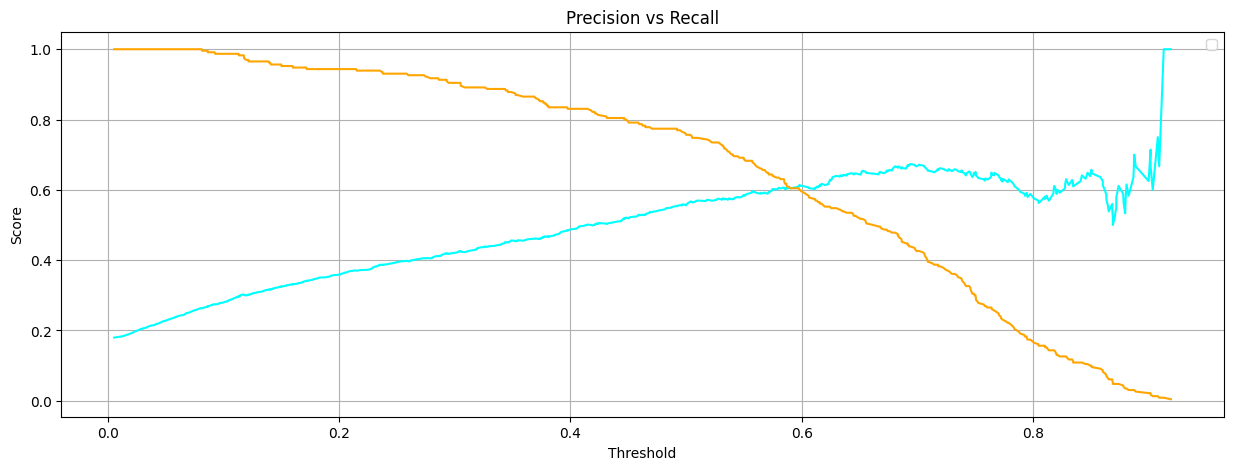

Optimal Threshold at: 0.5036913669569228
---
SMOTE


<Figure size 640x480 with 0 Axes>

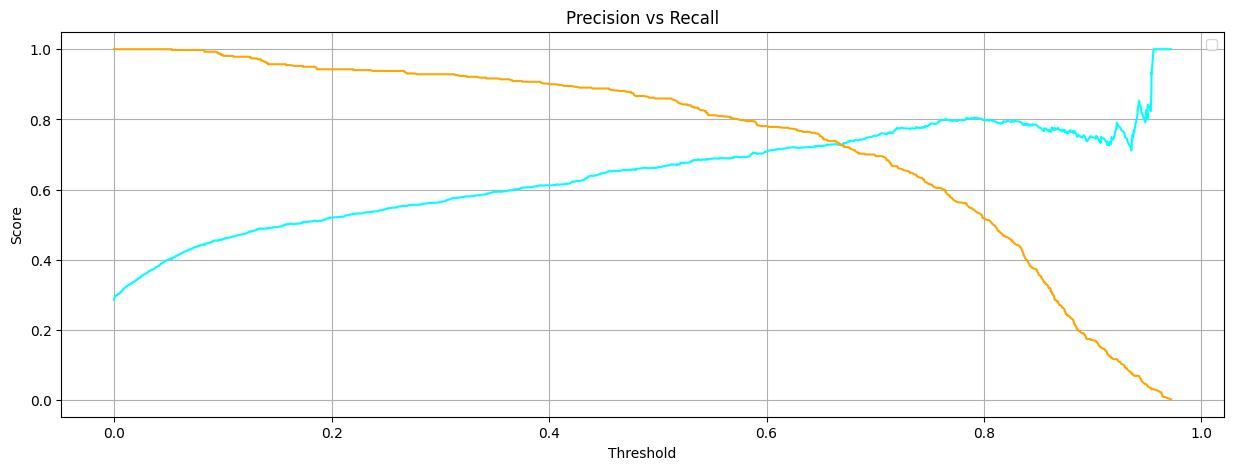

Optimal Threshold at: 0.5126696580532993
---
FE


<Figure size 640x480 with 0 Axes>

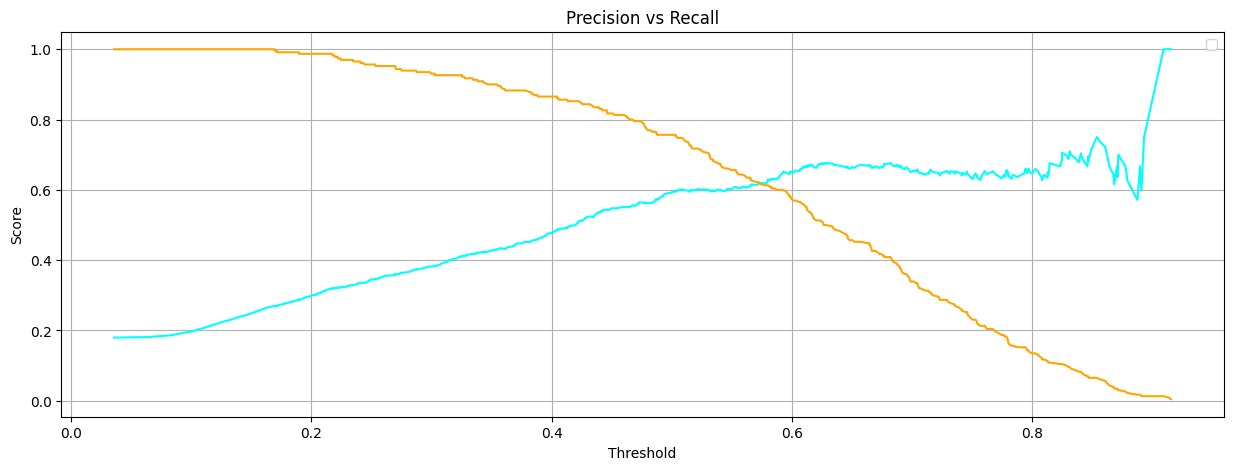

Optimal Threshold at: 0.5030542153324349
---


<Figure size 640x480 with 0 Axes>

In [52]:
vanilla_estimator, vanilla_threshold = \
model_summary(grid_search_estimator,
              X_train, y_train, 'Vanilla')

resample_estimator, resample_threshold = \
model_summary(resample_grid_search_estimator,
              X_train_resample, y_train_resample, 'SMOTE')

fe_estimator, fe_threshold = \
model_summary(fe_grid_search_estimator,
              X_train_fe, y_train, 'FE')

## Classification Report for Test data

In [53]:
## Vanilla Model
probability = vanilla_estimator.predict_proba(X_valid)[:,1]
report = classification_report(y_valid,(probability >= vanilla_threshold).astype(int))
print(report)

with open('Vanilla_Report.txt', 'w') as f:
    f.write(report)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       262
           1       0.56      0.78      0.65        58

    accuracy                           0.85       320
   macro avg       0.75      0.82      0.77       320
weighted avg       0.87      0.85      0.86       320



In [54]:
## SMOTE Model
probability = resample_estimator.predict_proba(X_valid)[:,1]
report = classification_report(y_valid,(probability >= resample_threshold).astype(int))
print(report)

with open('SMOTE_Report.txt', 'w') as f:
    f.write(report)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       262
           1       0.51      0.84      0.63        58

    accuracy                           0.82       320
   macro avg       0.73      0.83      0.76       320
weighted avg       0.88      0.82      0.84       320



In [55]:
# FE model
probability = fe_estimator.predict_proba(X_valid_fe)[:,1]
report = classification_report(y_valid,(probability >= fe_threshold).astype(int))
print(report)

with open('FE_Report.txt', 'w') as f:
    f.write(report)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       262
           1       0.59      0.76      0.66        58

    accuracy                           0.86       320
   macro avg       0.76      0.82      0.79       320
weighted avg       0.88      0.86      0.87       320

